# Data Collection

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

ds = pd.read_csv('customer_segmentation.csv')
ds.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6,D
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6,B
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6,B


# Data Inspection

In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [3]:
ds.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [4]:
ds.shape

(2627, 11)

# Data Cleaning

**For ID and Var_1 columns**

In [5]:
ds.drop(['ID', 'Var_1'], axis='columns', inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,A
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,C
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,D
7,Female,Yes,47,Yes,Artist,1.0,Average,3.0,D
8,Male,Yes,50,Yes,Artist,2.0,Average,4.0,B
9,Male,No,19,No,Healthcare,0.0,Low,4.0,B


**For Gender column**

In [6]:
ds['Gender'].isnull().sum()

0

In [7]:
ds['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
ds['Gender'] = ds['Gender'].replace({'Male':0,'Female':1})
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,Yes,36,Yes,Engineer,0.0,Low,1.0,B
1,0,Yes,37,Yes,Healthcare,8.0,Average,4.0,A
2,1,Yes,69,No,NaN,0.0,Low,1.0,A
3,0,Yes,59,No,Executive,11.0,High,2.0,B
4,1,No,19,No,Marketing,NaN,Low,4.0,A
5,0,Yes,47,Yes,Doctor,0.0,High,5.0,C
6,0,Yes,61,Yes,Doctor,5.0,Low,3.0,D
7,1,Yes,47,Yes,Artist,1.0,Average,3.0,D
8,0,Yes,50,Yes,Artist,2.0,Average,4.0,B
9,0,No,19,No,Healthcare,0.0,Low,4.0,B


**For Ever_Married column**

In [9]:
ds['Ever_Married'].isnull().sum()

50

In [10]:
ds['Ever_Married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [11]:
ds['Ever_Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
ds['Ever_Married'].fillna(0, inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,Yes,Engineer,0.0,Low,1.0,B
1,0,1.0,37,Yes,Healthcare,8.0,Average,4.0,A
2,1,1.0,69,No,NaN,0.0,Low,1.0,A
3,0,1.0,59,No,Executive,11.0,High,2.0,B
4,1,0.0,19,No,Marketing,NaN,Low,4.0,A
5,0,1.0,47,Yes,Doctor,0.0,High,5.0,C
6,0,1.0,61,Yes,Doctor,5.0,Low,3.0,D
7,1,1.0,47,Yes,Artist,1.0,Average,3.0,D
8,0,1.0,50,Yes,Artist,2.0,Average,4.0,B
9,0,0.0,19,No,Healthcare,0.0,Low,4.0,B


In [12]:
ds['Ever_Married'].isnull().sum()

0

In [13]:
ds['Ever_Married'].unique()

array([1., 0.])

**For Age column**

In [14]:
ds['Age'].isnull().sum()

0

In [15]:
ds['Age'].unique()

array([36, 37, 69, 59, 19, 47, 61, 50, 22, 27, 18, 20, 45, 55, 88, 63, 42,
       79, 35, 52, 29, 87, 89, 31, 72, 41, 62, 56, 60, 68, 57, 51, 86, 74,
       23, 80, 78, 48, 70, 83, 73, 46, 43, 32, 39, 71, 67, 49, 65, 33, 58,
       30, 21, 26, 81, 28, 76, 85, 66, 53, 40, 25, 77, 75, 82, 84, 38],
      dtype=int64)

**For Graduated column**

In [16]:
ds['Graduated'].isnull().sum()

24

In [17]:
ds['Graduated'].unique()

array(['Yes', 'No', nan], dtype=object)

In [18]:
ds['Graduated'].replace({'No': 0, 'Yes': 1}, inplace=True)
ds['Graduated'].fillna(1, inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,Engineer,0.0,Low,1.0,B
1,0,1.0,37,1.0,Healthcare,8.0,Average,4.0,A
2,1,1.0,69,0.0,NaN,0.0,Low,1.0,A
3,0,1.0,59,0.0,Executive,11.0,High,2.0,B
4,1,0.0,19,0.0,Marketing,NaN,Low,4.0,A
5,0,1.0,47,1.0,Doctor,0.0,High,5.0,C
6,0,1.0,61,1.0,Doctor,5.0,Low,3.0,D
7,1,1.0,47,1.0,Artist,1.0,Average,3.0,D
8,0,1.0,50,1.0,Artist,2.0,Average,4.0,B
9,0,0.0,19,0.0,Healthcare,0.0,Low,4.0,B


In [19]:
ds['Graduated'].isnull().sum()

0

In [20]:
ds['Graduated'].unique()

array([1., 0.])

**For Profession column**

In [21]:
ds['Profession'].isnull().sum()

38

In [22]:
ds['Profession'].unique()

array(['Engineer', 'Healthcare', nan, 'Executive', 'Marketing', 'Doctor',
       'Artist', 'Lawyer', 'Entertainment', 'Homemaker'], dtype=object)

In [23]:
ds['Profession'].fillna('Other', inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,Engineer,0.0,Low,1.0,B
1,0,1.0,37,1.0,Healthcare,8.0,Average,4.0,A
2,1,1.0,69,0.0,Other,0.0,Low,1.0,A
3,0,1.0,59,0.0,Executive,11.0,High,2.0,B
4,1,0.0,19,0.0,Marketing,NaN,Low,4.0,A
5,0,1.0,47,1.0,Doctor,0.0,High,5.0,C
6,0,1.0,61,1.0,Doctor,5.0,Low,3.0,D
7,1,1.0,47,1.0,Artist,1.0,Average,3.0,D
8,0,1.0,50,1.0,Artist,2.0,Average,4.0,B
9,0,0.0,19,0.0,Healthcare,0.0,Low,4.0,B


In [24]:
ds['Profession'].replace({'Engineer': 1,
    'Healthcare': 2,
    'Other': 3,
    'Executive': 4,
    'Marketing': 5,
    'Doctor': 6,
    'Artist': 7,
    'Lawyer': 8,
    'Entertainment': 9,
    'Homemaker': 10}, inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,1,0.0,Low,1.0,B
1,0,1.0,37,1.0,2,8.0,Average,4.0,A
2,1,1.0,69,0.0,3,0.0,Low,1.0,A
3,0,1.0,59,0.0,4,11.0,High,2.0,B
4,1,0.0,19,0.0,5,NaN,Low,4.0,A
5,0,1.0,47,1.0,6,0.0,High,5.0,C
6,0,1.0,61,1.0,6,5.0,Low,3.0,D
7,1,1.0,47,1.0,7,1.0,Average,3.0,D
8,0,1.0,50,1.0,7,2.0,Average,4.0,B
9,0,0.0,19,0.0,2,0.0,Low,4.0,B


In [25]:
ds['Profession'].isnull().sum()

0

In [26]:
ds['Profession'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

**For Work_Experience column**

In [27]:
ds['Work_Experience'].isnull().sum()

269

In [28]:
ds['Work_Experience'].unique()

array([ 0.,  8., 11., nan,  5.,  1.,  2.,  9.,  3.,  6.,  7.,  4., 13.,
       10., 12., 14.])

In [29]:
ds['Work_Experience'].value_counts()

1.0     773
0.0     769
8.0     149
9.0     139
4.0      93
2.0      87
3.0      82
5.0      76
6.0      61
7.0      60
14.0     21
11.0     14
12.0     12
13.0     11
10.0     11
Name: Work_Experience, dtype: int64

In [30]:
ds['Work_Experience'].describe()

count    2358.000000
mean        2.552587
std         3.341094
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [31]:
print(ds['Work_Experience'].median())
print(ds['Work_Experience'].mode()[0])

1.0
1.0


In [32]:
ds['Work_Experience'].fillna(1, inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,1,0.0,Low,1.0,B
1,0,1.0,37,1.0,2,8.0,Average,4.0,A
2,1,1.0,69,0.0,3,0.0,Low,1.0,A
3,0,1.0,59,0.0,4,11.0,High,2.0,B
4,1,0.0,19,0.0,5,1.0,Low,4.0,A
5,0,1.0,47,1.0,6,0.0,High,5.0,C
6,0,1.0,61,1.0,6,5.0,Low,3.0,D
7,1,1.0,47,1.0,7,1.0,Average,3.0,D
8,0,1.0,50,1.0,7,2.0,Average,4.0,B
9,0,0.0,19,0.0,2,0.0,Low,4.0,B


In [33]:
ds['Work_Experience'].isnull().sum()

0

**For Spending_Score column**

In [34]:
ds['Spending_Score'].isnull().sum()

0

In [35]:
ds['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [36]:
ds['Spending_Score'].replace({'Low': 0, 
                              'Average': 1, 
                              'High': 2}, 
                             inplace=True)
ds.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,1,0.0,0,1.0,B
1,0,1.0,37,1.0,2,8.0,1,4.0,A
2,1,1.0,69,0.0,3,0.0,0,1.0,A
3,0,1.0,59,0.0,4,11.0,2,2.0,B
4,1,0.0,19,0.0,5,1.0,0,4.0,A
5,0,1.0,47,1.0,6,0.0,2,5.0,C
6,0,1.0,61,1.0,6,5.0,0,3.0,D
7,1,1.0,47,1.0,7,1.0,1,3.0,D
8,0,1.0,50,1.0,7,2.0,1,4.0,B
9,0,0.0,19,0.0,2,0.0,0,4.0,B


**For Family_Size column**

In [37]:
ds['Family_Size'].isnull().sum()

113

In [38]:
ds['Family_Size'].unique()

array([ 1.,  4.,  2.,  5.,  3.,  6., nan,  8.,  7.,  9.])

In [39]:
ds['Family_Size'].value_counts()

2.0    768
1.0    512
3.0    455
4.0    444
5.0    200
6.0     78
7.0     26
9.0     16
8.0     15
Name: Family_Size, dtype: int64

In [40]:
ds['Family_Size'].describe()

count    2514.000000
mean        2.825378
std         1.551906
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

In [41]:
print(ds['Family_Size'].median())
print(ds['Family_Size'].mode()[0])

2.0
2.0


In [42]:
ds['Family_Size'].fillna(2, inplace=True)
ds.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,1,0.0,0,1.0,B
1,0,1.0,37,1.0,2,8.0,1,4.0,A
2,1,1.0,69,0.0,3,0.0,0,1.0,A
3,0,1.0,59,0.0,4,11.0,2,2.0,B
4,1,0.0,19,0.0,5,1.0,0,4.0,A


In [43]:
ds['Family_Size'].isnull().sum()

0

**For Segmentation column**

In [44]:
ds['Segmentation'].isnull().sum()

0

In [45]:
ds['Segmentation'].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

In [46]:
ds['Segmentation'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3}, inplace=True)
ds.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,1.0,36,1.0,1,0.0,0,1.0,1
1,0,1.0,37,1.0,2,8.0,1,4.0,0
2,1,1.0,69,0.0,3,0.0,0,1.0,0
3,0,1.0,59,0.0,4,11.0,2,2.0,1
4,1,0.0,19,0.0,5,1.0,0,4.0,0


In [47]:
ds['Segmentation'].unique()

array([1, 0, 2, 3], dtype=int64)

**Final check for null value**

In [48]:
ds.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [49]:
ds = ds.astype(float)

# EDA

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

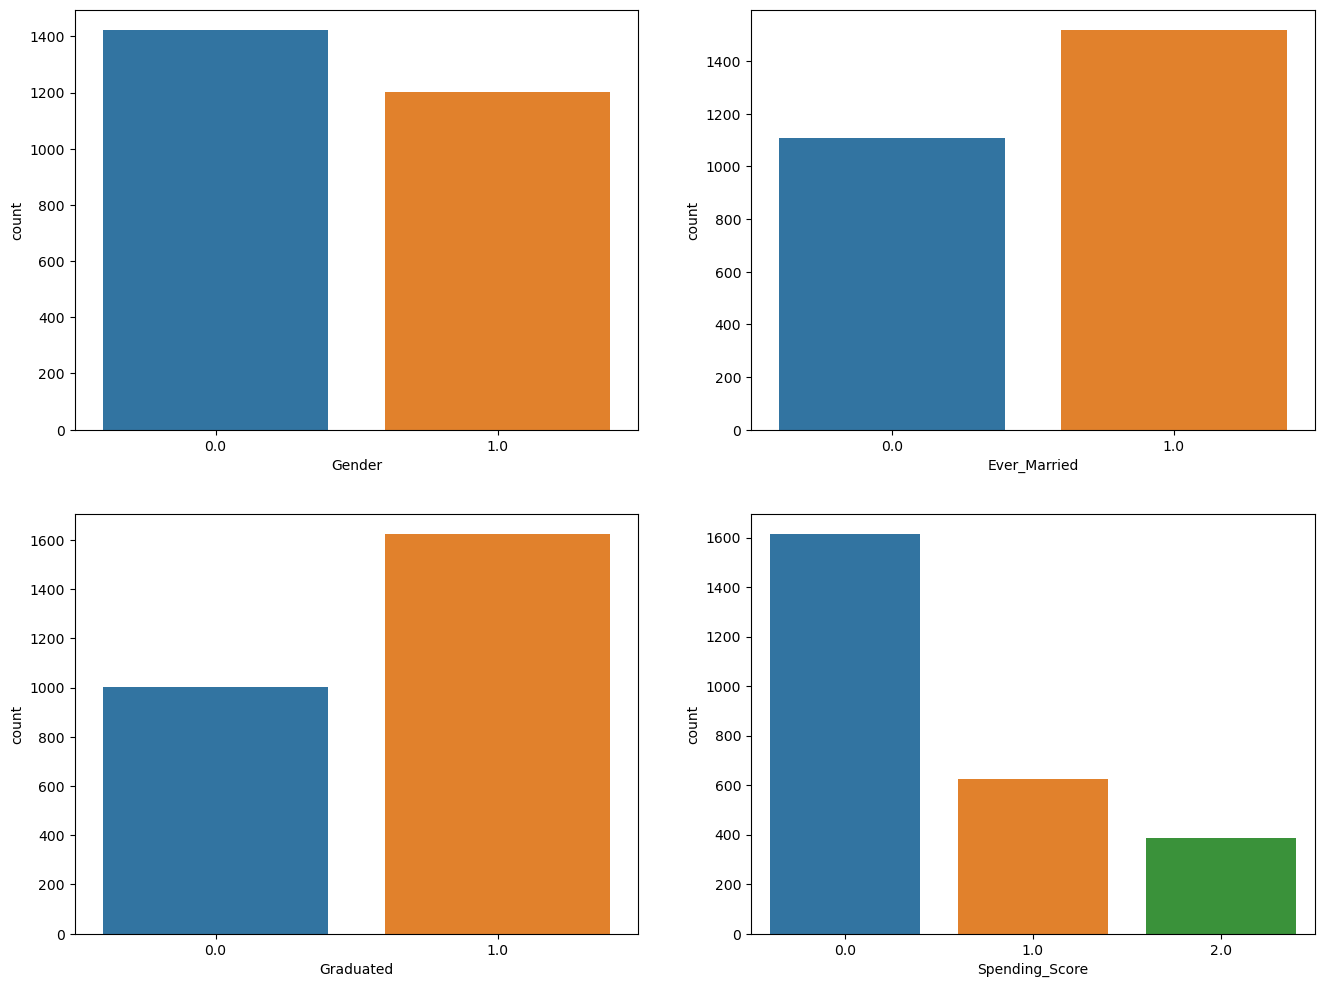

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,12))
plt.subplot(2,2,1)
sns.countplot(x ='Gender', data = ds)
plt.subplot(2,2,2)
sns.countplot(x ='Ever_Married', data = ds)
plt.subplot(2,2,3)
sns.countplot(x ='Graduated', data = ds)
plt.subplot(2,2,4)
sns.countplot(x ='Spending_Score', data = ds)

<AxesSubplot:xlabel='Profession', ylabel='count'>

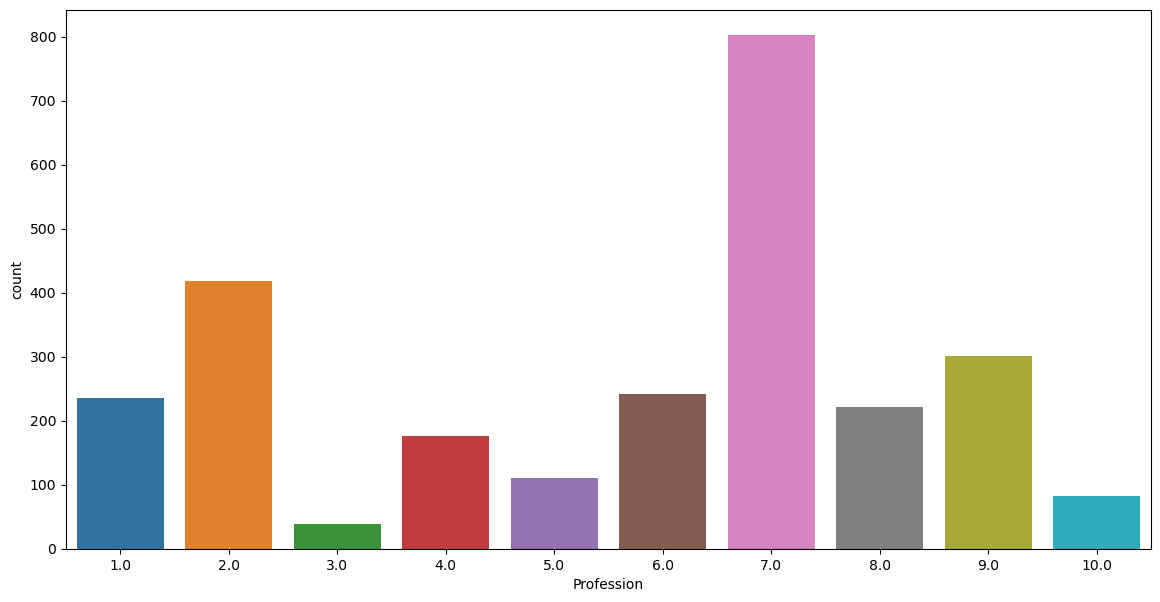

In [51]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Profession', data = ds)

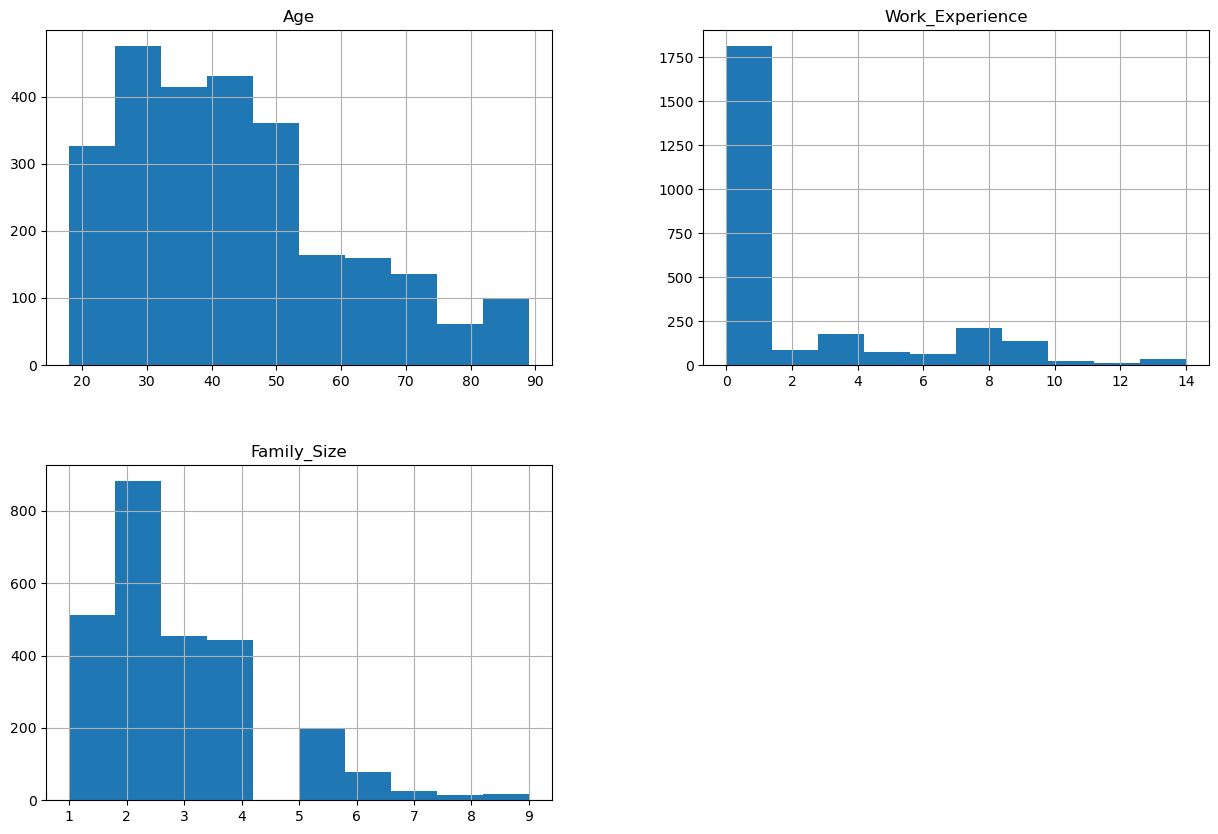

In [52]:
selected_columns = ['Age', 'Work_Experience', 'Family_Size']
ds[selected_columns].hist(bins=10, figsize=(15, 10))
plt.show()

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

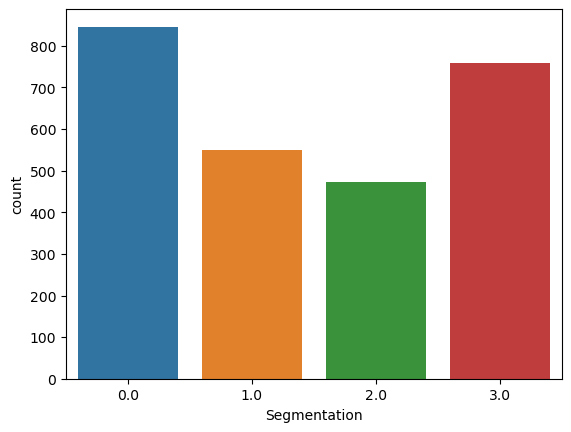

In [53]:
sns.countplot(x ='Segmentation', data = ds)

<AxesSubplot:xlabel='Gender', ylabel='count'>

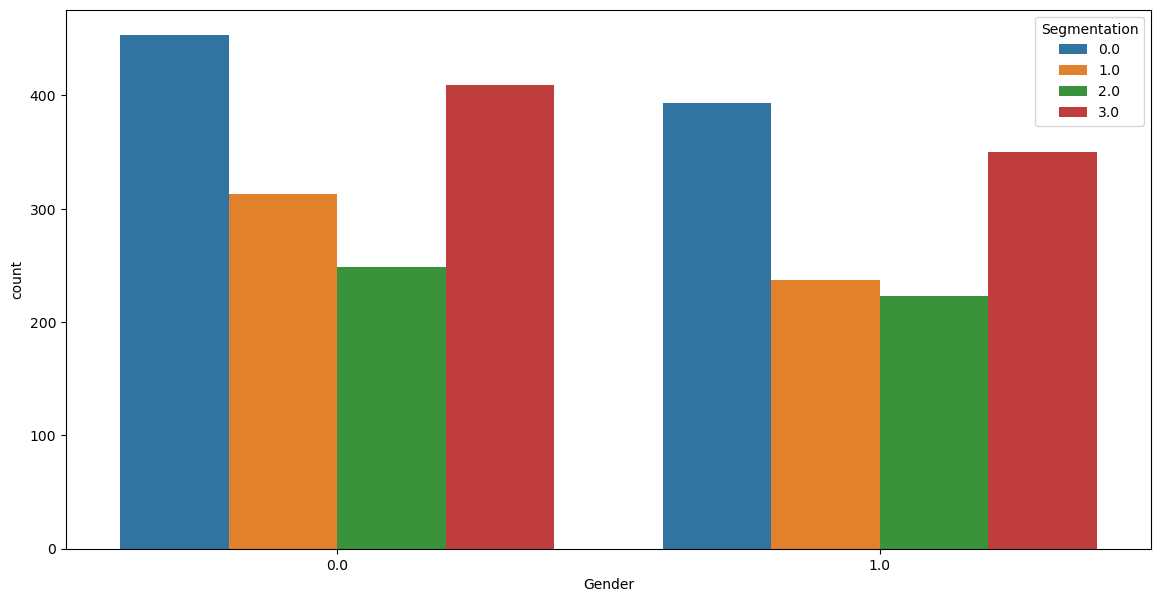

In [54]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Gender', hue = 'Segmentation', data = ds)

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

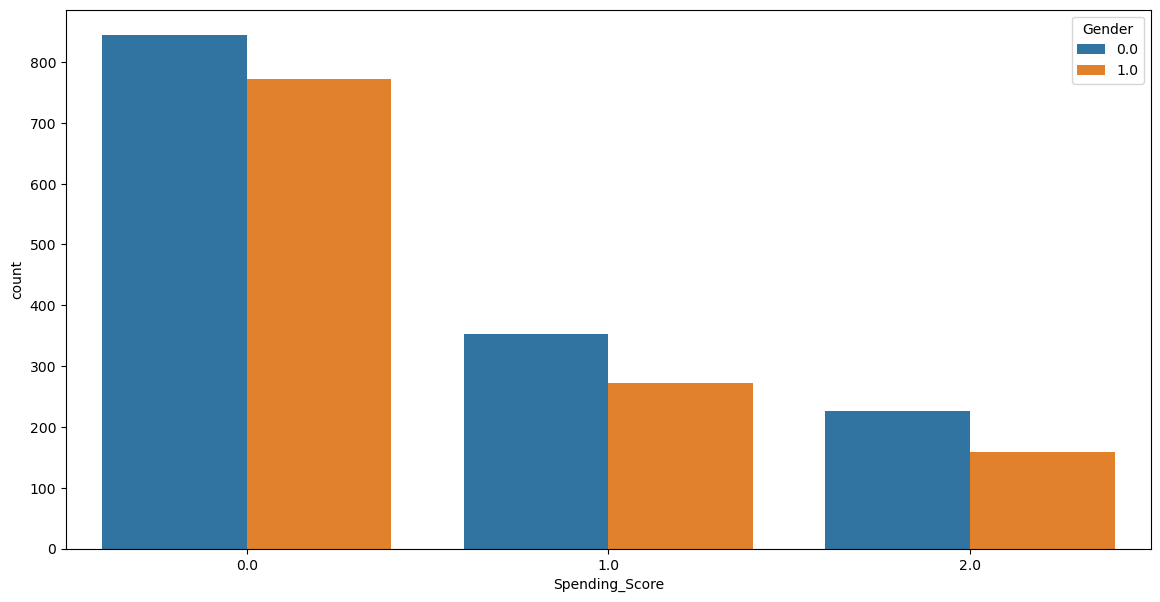

In [55]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Spending_Score', hue = 'Gender', data = ds)

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

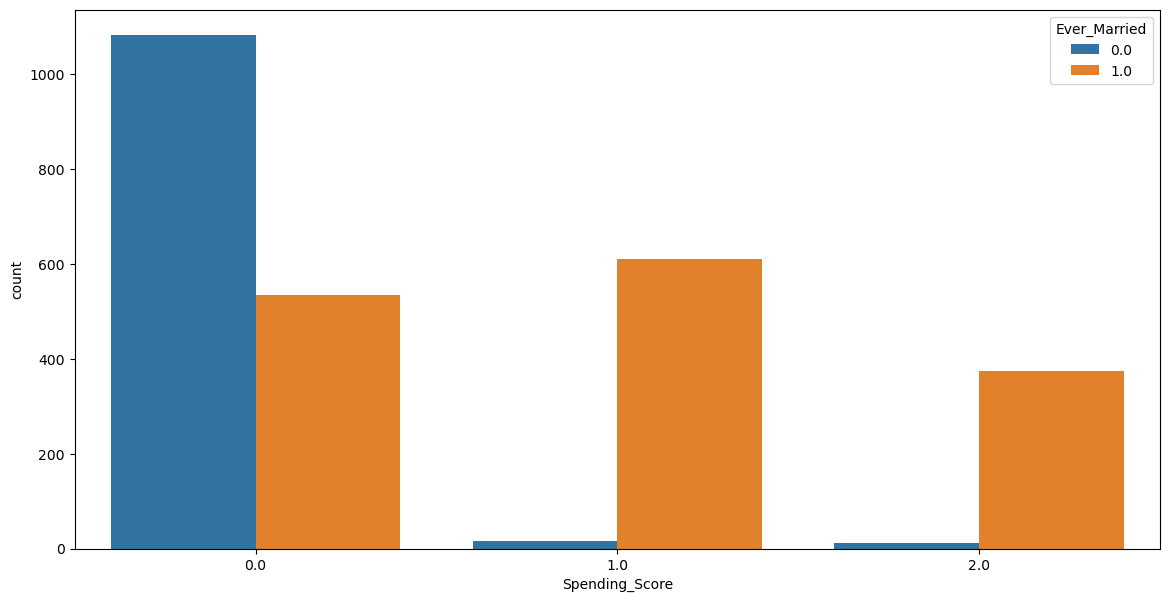

In [56]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Spending_Score', hue = 'Ever_Married', data = ds)

<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

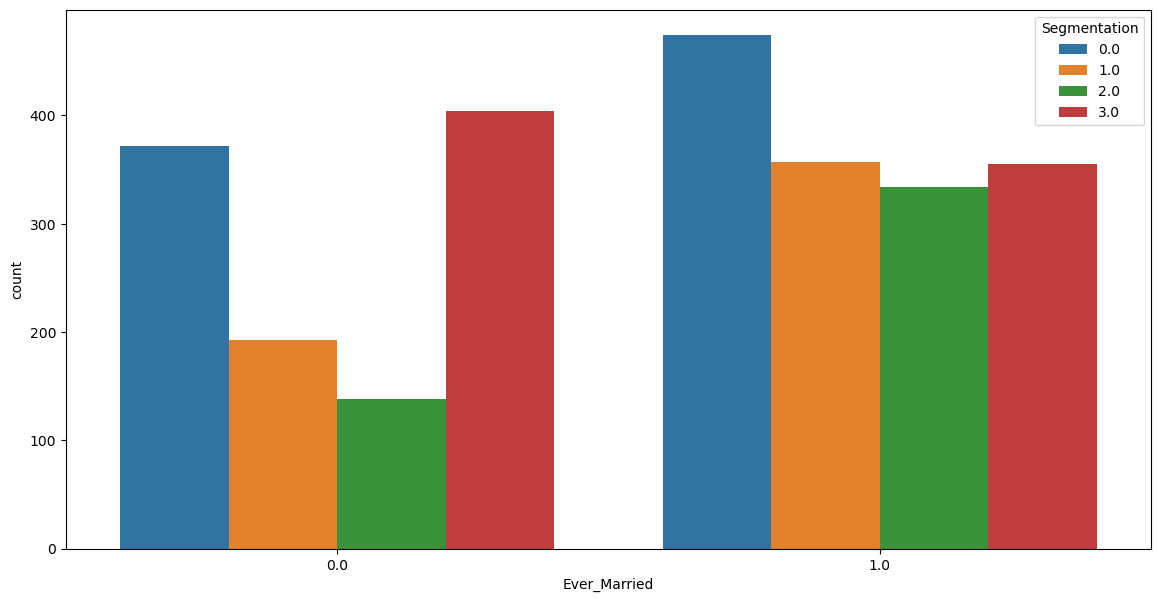

In [57]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Ever_Married', hue = 'Segmentation', data = ds)

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

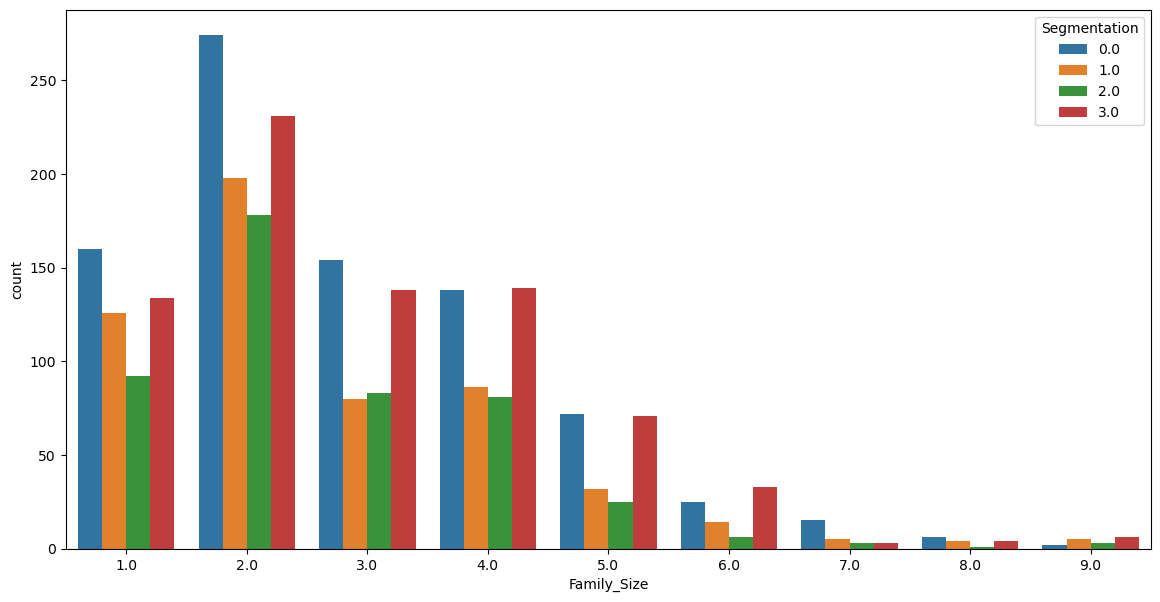

In [58]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Family_Size', hue = 'Segmentation', data = ds)

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

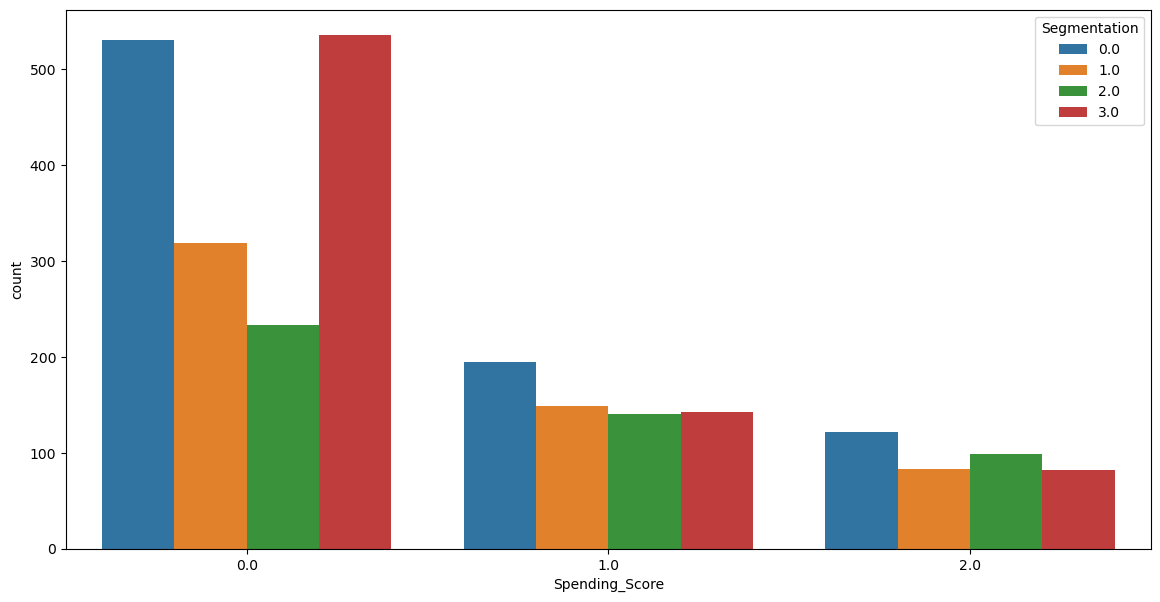

In [59]:
plt.figure(figsize = (14,7))
sns.countplot(x ='Spending_Score', hue = 'Segmentation', data = ds)

# Split data

In [60]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   float64
 1   Ever_Married     2627 non-null   float64
 2   Age              2627 non-null   float64
 3   Graduated        2627 non-null   float64
 4   Profession       2627 non-null   float64
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   float64
 7   Family_Size      2627 non-null   float64
 8   Segmentation     2627 non-null   float64
dtypes: float64(9)
memory usage: 184.8 KB


In [61]:
x = ds.iloc[:, :-1].values
x

array([[ 1.,  1., 36., ...,  0.,  0.,  1.],
       [ 0.,  1., 37., ...,  8.,  1.,  4.],
       [ 1.,  1., 69., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  0., 53., ...,  1.,  0.,  2.],
       [ 0.,  1., 47., ...,  1.,  2.,  5.],
       [ 1.,  0., 43., ...,  9.,  0.,  3.]])

In [62]:
y = ds.iloc[:, 8].values
y

array([1., 0., 0., ..., 2., 2., 0.])

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [64]:
print('x_train:', x_train)
print('x_test:', x_test)
print('y_train:', y_train)
print('y_test:', y_test)

x_train: [[ 0.  0. 55. ...  1.  0.  1.]
 [ 1.  0. 25. ...  0.  0.  9.]
 [ 0.  1. 36. ...  3.  0.  2.]
 ...
 [ 1.  0. 69. ...  1.  0.  5.]
 [ 1.  0. 36. ...  1.  0.  4.]
 [ 0.  1. 48. ...  3.  0.  1.]]
x_test: [[ 1.  1. 67. ...  0.  0.  1.]
 [ 1.  0. 33. ...  1.  0.  3.]
 [ 1.  0. 40. ...  1.  0.  1.]
 ...
 [ 1.  0. 25. ...  1.  0.  3.]
 [ 0.  0. 28. ...  0.  0.  3.]
 [ 0.  1. 27. ...  1.  0.  6.]]
y_train: [1. 1. 2. ... 3. 3. 1.]
y_test: [0. 0. 2. 3. 2. 2. 0. 0. 3. 2. 0. 0. 1. 3. 1. 0. 0. 3. 1. 2. 0. 2. 0. 0.
 3. 3. 0. 0. 3. 0. 1. 1. 0. 0. 1. 3. 1. 3. 3. 2. 2. 0. 3. 1. 2. 3. 0. 0.
 3. 3. 0. 0. 3. 0. 2. 3. 3. 0. 0. 0. 2. 3. 3. 1. 1. 1. 3. 0. 3. 1. 1. 3.
 0. 1. 2. 0. 2. 3. 1. 1. 0. 3. 0. 1. 0. 0. 3. 2. 3. 0. 3. 2. 3. 3. 0. 3.
 0. 3. 3. 0. 2. 3. 1. 1. 1. 0. 2. 0. 0. 0. 1. 0. 1. 3. 3. 3. 2. 1. 0. 2.
 3. 3. 0. 0. 1. 0. 2. 0. 2. 1. 1. 0. 3. 3. 1. 3. 2. 2. 1. 2. 2. 1. 3. 1.
 2. 0. 1. 3. 3. 2. 3. 3. 2. 2. 3. 0. 0. 3. 3. 2. 1. 3. 1. 1. 1. 0. 1. 0.
 2. 1. 0. 0. 3. 0. 3. 1. 2. 2. 2. 2. 1. 0. 0. 0

# Scale data

In [65]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print('x_train:', x_train)
print('x_test:', x_test)

x_train: [[-0.92465701 -1.16709482  0.67745756 ... -0.4500997  -0.72319979
  -1.17312228]
 [ 1.0814821  -1.16709482 -1.09169722 ... -0.76067638 -0.72319979
   3.99701395]
 [-0.92465701  0.85682841 -0.44300713 ...  0.17105365 -0.72319979
  -0.52685525]
 ...
 [ 1.0814821  -1.16709482  1.50306313 ... -0.4500997  -0.72319979
   1.41194583]
 [ 1.0814821  -1.16709482 -0.44300713 ... -0.4500997  -0.72319979
   0.7656788 ]
 [-0.92465701  0.85682841  0.26465478 ...  0.17105365 -0.72319979
  -1.17312228]]
x_test: [[ 1.0814821   0.85682841  1.38511947 ... -0.76067638 -0.72319979
  -1.17312228]
 [ 1.0814821  -1.16709482 -0.61992261 ... -0.4500997  -0.72319979
   0.11941178]
 [ 1.0814821  -1.16709482 -0.20711983 ... -0.4500997  -0.72319979
  -1.17312228]
 ...
 [ 1.0814821  -1.16709482 -1.09169722 ... -0.4500997  -0.72319979
   0.11941178]
 [-0.92465701 -1.16709482 -0.91478174 ... -0.76067638 -0.72319979
   0.11941178]
 [-0.92465701  0.85682841 -0.97375357 ... -0.4500997  -0.72319979
   2.05821286]]

# Naïve Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [76]:
y_pred_nb = nb_classifier.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[61,  2, 60, 80],
       [53,  2, 54, 41],
       [32,  2, 53, 31],
       [46,  1, 45, 94]], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
error_nb = 100 - accuracy_nb
precision_nb = precision_score(y_test, y_pred_nb, average='weighted') * 100
print("Naive Bayes Accuracy Rate:", accuracy_nb, "%")
print("Naive Bayes Error Rate:", error_nb, "%")
print("Naive Bayes Precision Rate:", precision_nb, "%")

Naive Bayes Accuracy Rate: 31.963470319634702 %
Naive Bayes Error Rate: 68.0365296803653 %
Naive Bayes Precision Rate: 31.64765681210302 %


# Logistics Regression

In [79]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [80]:
y_pred_lr = lr_classifier.predict(x_test)

In [81]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[125,   0,  12,  66],
       [108,   0,   7,  35],
       [ 79,   0,  13,  26],
       [ 86,   0,   7,  93]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
error_lr = 100 - accuracy_lr
precision_lr = precision_score(y_test, y_pred_lr, average='weighted') * 100
print("Logistic Regression Accuracy Rate:", accuracy_lr, "%")
print("Logistic Regression Error Rate:", error_lr, "%")
print("Logistic Regression Precision Rate:", precision_lr, "%")

Logistic Regression Accuracy Rate: 35.15981735159817 %
Logistic Regression Error Rate: 64.84018264840182 %
Logistic Regression Precision Rate: 27.658582567373095 %


# k-Nearest Neighbors

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
y_pred_knn = knn_classifier.predict(x_test)

In [85]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[104,  31,  24,  44],
       [ 69,  33,  25,  23],
       [ 67,  21,  20,  10],
       [ 83,  31,  21,  51]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
error_knn = 100 - accuracy_knn
precision_knn = precision_score(y_test, y_pred_knn, average='weighted') * 100
print("K-Nearest Neighbors Accuracy Rate:", accuracy_knn, "%")
print("K-Nearest Neighbors Error Rate:", error_knn, "%")
print("K-Nearest Neighbors Precision Rate:", precision_knn, "%")

K-Nearest Neighbors Accuracy Rate: 31.65905631659056 %
K-Nearest Neighbors Error Rate: 68.34094368340944 %
K-Nearest Neighbors Precision Rate: 31.71480062671124 %


# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred_dt = dt_classifier.predict(x_test)

In [89]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[62, 50, 36, 55],
       [48, 35, 28, 39],
       [41, 29, 23, 25],
       [61, 46, 30, 49]], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
error_dt = 100 - accuracy_dt
precision_dt = precision_score(y_test, y_pred_dt, average='weighted') * 100
print("Decision Tree Accuracy Rate:", accuracy_dt, "%")
print("Decision Tree Error Rate:", error_dt, "%")
print("Decision Tree Precision Rate:", precision_dt, "%")

Decision Tree Accuracy Rate: 25.72298325722983 %
Decision Tree Error Rate: 74.27701674277017 %
Decision Tree Precision Rate: 25.818417918551457 %


# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
y_pred_rf = rf_classifier.predict(x_test)

In [93]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[76, 35, 27, 65],
       [58, 42, 18, 32],
       [53, 21, 20, 24],
       [65, 27, 28, 66]], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
error_rf = 100 - accuracy_rf
precision_rf = precision_score(y_test, y_pred_rf, average='weighted') * 100
print("Random Forest Accuracy Rate:", accuracy_rf, "%")
print("Random Forest Error Rate:", error_rf, "%")
print("Random Forest Precision Rate:", precision_rf, "%")

Random Forest Accuracy Rate: 31.05022831050228 %
Random Forest Error Rate: 68.94977168949772 %
Random Forest Precision Rate: 30.844082972872627 %


# Compile all result

In [95]:
print(f"Naive Bayes Accuracy Rate: {accuracy_nb:.2f}%")
print(f"Naive Bayes Error Rate: {error_nb:.2f}%")
print(f"Naive Bayes Precision Rate: {precision_nb:.2f}%")
print('\n')
print(f"Logistic Regression Accuracy Rate: {accuracy_lr:.2f}%")
print(f"Logistic Regression Error Rate: {error_lr:.2f}%")
print(f"Logistic Regression Precision Rate: {precision_lr:.2f}%")
print('\n')
print(f"KNN Accuracy Rate: {accuracy_knn:.2f}%")
print(f"KNN Error Rate: {error_knn:.2f}%")
print(f"KNN Precision Rate: {precision_knn:.2f}%")
print('\n')
print(f"Decision Tree Accuracy Rate: {accuracy_dt:.2f}%")
print(f"Decision Tree Error Rate: {error_dt:.2f}%")
print(f"Decision Tree Precision Rate: {precision_dt:.2f}%")
print('\n')
print(f"Random Forest Accuracy Rate: {accuracy_rf:.2f}%")
print(f"Random Forest Error Rate: {error_rf:.2f}%")
print(f"Random Forest Precision Rate: {precision_rf:.2f}%")

Naive Bayes Accuracy Rate: 31.96%
Naive Bayes Error Rate: 68.04%
Naive Bayes Precision Rate: 31.65%


Logistic Regression Accuracy Rate: 35.16%
Logistic Regression Error Rate: 64.84%
Logistic Regression Precision Rate: 27.66%


KNN Accuracy Rate: 31.66%
KNN Error Rate: 68.34%
KNN Precision Rate: 31.71%


Decision Tree Accuracy Rate: 25.72%
Decision Tree Error Rate: 74.28%
Decision Tree Precision Rate: 25.82%


Random Forest Accuracy Rate: 31.05%
Random Forest Error Rate: 68.95%
Random Forest Precision Rate: 30.84%


# Conclusion:

Logistic Regression achieved the highest accuracy rate at 35.16%, followed by Random Forest at 31.35%, Naive Bayes at 31.96%, K-Nearest Neighbors (KNN) at 31.66%, and Decision Tree at 28.01%.

The Error Rate indicates the percentage of misclassifications. Lower error rates are desirable. Logistic Regression has the lowest error rate at 64.84%, while Decision Tree has the highest error rate at 71.99%.

Precision measures the model's ability to correctly identify positive cases. It's essential when false positives are costly. Logistic Regression has the highest precision rate at 27.66%, and Decision Tree follows with a precision rate of 28.21%.

# Suggestions:

Considering the highest accuracy rate, Logistic Regression appears to be the most accurate model among the options provided.

If precision is a critical factor, Logistic Regression may still be the preferred choice as it has the highest precision. However, you might want to fine-tune its hyperparameters to improve precision further.

If you are more concerned about the simplicity of the model, Naive Bayes could be an alternative with relatively good accuracy, a lower error rate, and a precision rate close to Logistic Regression.

If interpretability is important, Decision Tree may be a choice, even though it has the lowest accuracy and precision. You can try to optimize its structure or use an ensemble method like Random Forest to improve its performance.

It's also worth exploring further hyperparameter tuning, feature engineering, and potentially gathering more data to enhance the performance of the selected model.

Keep in mind that the choice of the best model depends on the specific problem, the importance of different evaluation metrics, and the available resources for model deployment and maintenance.

# Precision and accuracy are two common evaluation metrics used in machine learning to assess the performance of classification models. They measure different aspects of a model's performance:

1. **Accuracy:**
   - Accuracy is a measure of how many correct predictions the model makes out of the total predictions.
   - It calculates the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
   - Formula: (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)

   Accuracy provides an overall assessment of the model's correctness, but it may not be suitable when the dataset is imbalanced, meaning that one class is much more frequent than the others. In such cases, a high accuracy score can be misleading if the model is biased toward the majority class.

2. **Precision:**
   - Precision measures the ability of the model to correctly identify positive instances out of the total instances it predicted as positive.
   - It is particularly relevant when false positives are costly or undesirable.
   - Formula: True Positives / (True Positives + False Positives)

   Precision provides insight into the reliability of the model's positive predictions. A high precision means that the model is cautious about labeling an instance as positive, and it has a low rate of false positives. This is important in scenarios where false positives can have significant consequences.

In summary:
- Accuracy is a good metric for balanced datasets where the classes have roughly equal representation. It measures overall correctness.
- Precision is valuable when you want to minimize false positives, such as in medical diagnoses or fraud detection. It assesses the reliability of positive predictions.

It's essential to choose the evaluation metric that aligns with the specific goals and challenges of your machine learning task. Sometimes, you may need to consider both precision and accuracy, along with other metrics like recall (sensitivity) and F1-score, to get a comprehensive understanding of your model's performance.